## Erik Bayerlein - 537606

In [84]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Optimization Algorithms

#### Auxiliary Algorithms

In [52]:
def zscore_norm(dataset):
    n = dataset.shape[0]
    mu = 1/n * np.sum(dataset, axis=0)
    sigma = np.sqrt(1/(n-1) * np.sum((dataset - mu)**2, axis=0))
    return (dataset - mu) / sigma

In [53]:
MSE = lambda y_hat, y, n: (1/n) * np.sum((y - y_hat) ** 2, axis=0)

#### Ordinary Least Squares (OLS)

In [25]:
def ols(
    x: np.ndarray,
    y: np.ndarray
):
    x_trans = x.T
    return np.linalg.inv(x_trans @ x) @ x_trans @ y

#### Gradient Descent (GD)

In [ ]:
def gradient_descent(
    x: np.ndarray,
    y: np.ndarray,
    iterations: int,
    alpha: float = 0.1
):
    x = np.asanyarray(x).reshape(-1)
    y = np.asanyarray(y).reshape(-1)

    w0 = 1.0
    w1 = 1.0

    n = y.size
    w_history = []
    mse_history = []
    y_hat = w0 + w1*x

    for _ in range(iterations):
        error = y - y_hat

        w0 += alpha * 1/n * np.sum(error, axis=0)
        w1 += alpha * 1/n * np.sum(error * x, axis=0)

        y_hat = w0 + w1 * x

        w_history.append([w0, w1])
        mse_history.append(MSE(y_hat, y, n))

    return np.array(w_history), np.array(mse_history)

#### Stochastic Gradient Descent (SGD)

In [183]:
def stochastic_gradient_descent(
    x: np.ndarray,
    y: np.ndarray,
    epochs: int,
    alpha: float = 0.1
):
    x = np.asanyarray(x).reshape(-1)
    y = np.asanyarray(y).reshape(-1)

    w0 = 1.0
    w1 = 1.0

    n = y.size
    w_history = []
    mse_history = []

    for epoch in range(epochs):
        for i in np.random.permutation(y.shape[0]):
            y_hat_i = w0 + w1 * x[i]
            error_i = y[i] - y_hat_i

            w0 += alpha * error_i
            w1 += alpha * error_i * x[i]
        
        y_hat = w0 + w1 * x
        mse_history.append(MSE(y_hat, y, n))
        w_history.append([w0, w1])

    return np.array(w_history), np.array(mse_history)

------------

### Q1

#### a) OLS + MSE

Parameters

In [31]:
data = np.genfromtxt('../../datasets/artificial1d.csv', delimiter=',')
data

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

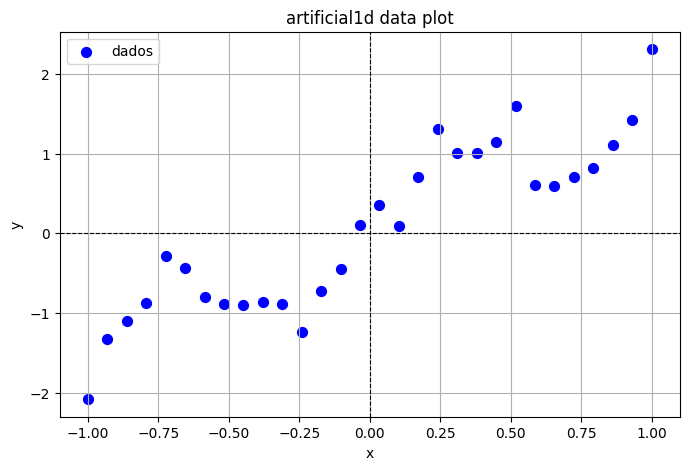

In [32]:
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", s=50, label="dados")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("artificial1d data plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

It's necessary to normalize the parameters before the training

In [ ]:
normalized_data = zscore_norm(data)

x = np.c_[np.ones(normalized_data.shape[0]).T, normalized_data[:, [0]]]
y = normalized_data[:, [1]]

w = ols(x, y)
y_hat = x @ w

mse = MSE(y_hat, y, y_hat.shape[0])
mse

array([0.1880212])

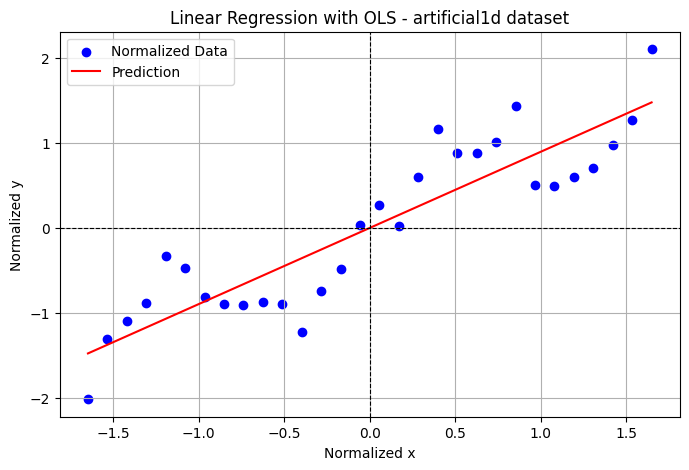

In [79]:
plt.figure(figsize=(8,5))
plt.scatter(normalized_data[:,0], y, color="blue", label="Normalized Data")
plt.plot(normalized_data[:,0], y_hat, color="red", label="Prediction")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Linear Regression with OLS - artificial1d dataset")
plt.xlabel("Normalized x")
plt.ylabel("Normalized y")
plt.legend()
plt.grid(True)
plt.show()

#### b) GD + MSE

In [165]:
data = np.genfromtxt('../../datasets/artificial1d.csv', delimiter=',')
data

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

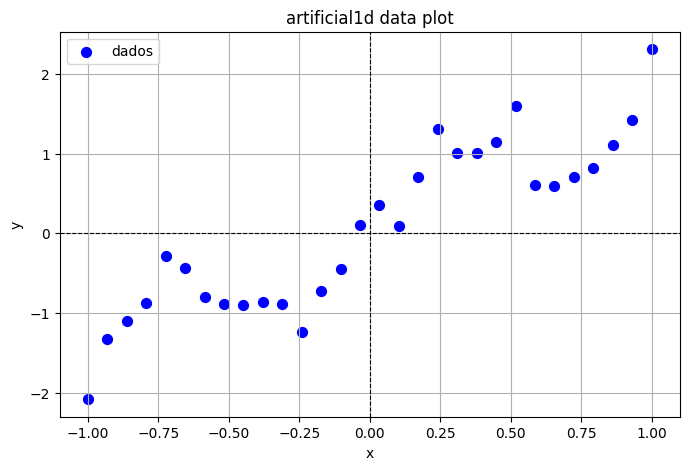

In [166]:
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", s=50, label="dados")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("artificial1d data plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [173]:
normalized_data = zscore_norm(data)

x = normalized_data[:, 0]
y = normalized_data[:, 1]

iters = 100
alpha = 0.15

w_hist, mse_hist = gradient_descent(x, y, iterations=iters, alpha=alpha)
print(f"MSE found: {mse_hist[-1]}")

MSE found: 0.18802119710049472


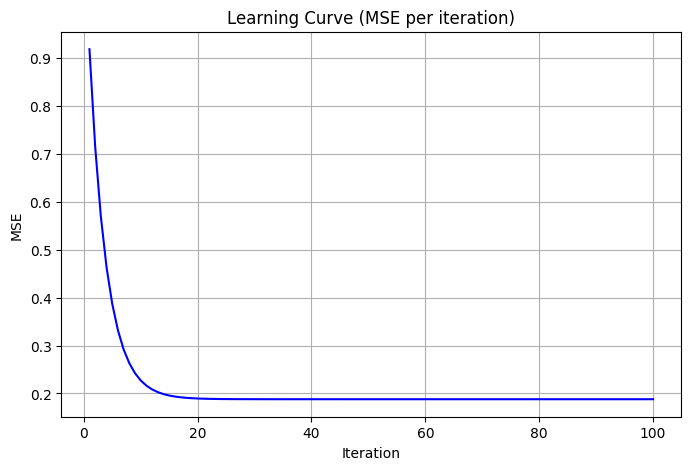

In [174]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, iters+1), mse_hist, color="blue")
plt.title("Learning Curve (MSE per iteration)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

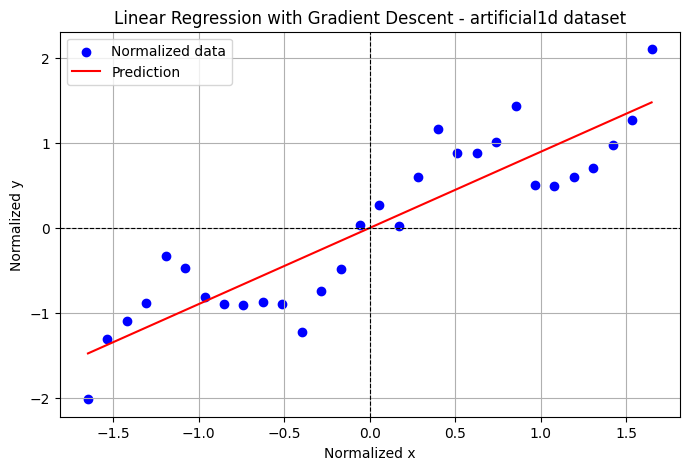

In [175]:
w0_final, w1_final = w_hist[-1]
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", label="Normalized data")
plt.plot(x, w0_final + w1_final * x, color="red", label="Prediction")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Linear Regression with Gradient Descent - artificial1d dataset")
plt.xlabel("Normalized x")
plt.ylabel("Normalized y")
plt.legend()
plt.grid(True)
plt.show()

#### c) SGD + MSE

In [176]:
data = np.genfromtxt('../../datasets/artificial1d.csv', delimiter=',')
data

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

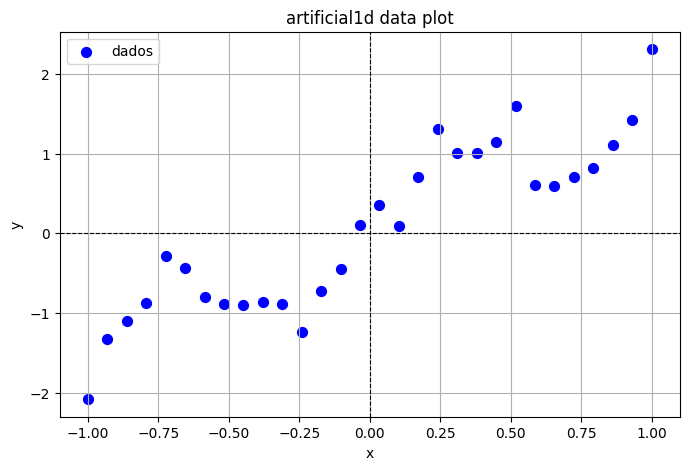

In [177]:
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", s=50, label="dados")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("artificial1d data plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [184]:
normalized_data = zscore_norm(data)

x = normalized_data[:, 0]
y = normalized_data[:, 1]

epochs = 100
alpha = 0.01

w_hist, mse_hist = stochastic_gradient_descent(x, y, epochs=epochs, alpha=alpha)
print(f"MSE found: {mse_hist[-1]}")
mse_hist

MSE found: 0.18802836951156554


array([0.73926977, 0.49026199, 0.35370686, 0.27842101, 0.23749071,
       0.21375951, 0.20234357, 0.19630027, 0.19248109, 0.19082067,
       0.18922633, 0.18885758, 0.18834388, 0.18815054, 0.18812696,
       0.18812877, 0.18805716, 0.18804914, 0.18804953, 0.18803615,
       0.18803196, 0.18804597, 0.18802734, 0.18802258, 0.18802404,
       0.18802603, 0.18802603, 0.18803236, 0.18803903, 0.18802133,
       0.18802296, 0.18802681, 0.18803667, 0.18803711, 0.18803331,
       0.18805275, 0.18804395, 0.1880323 , 0.18802397, 0.18802228,
       0.18802263, 0.18802262, 0.18802584, 0.18802414, 0.18802883,
       0.18802824, 0.18802149, 0.18802584, 0.18803787, 0.18802658,
       0.18803036, 0.18803175, 0.18802755, 0.18802305, 0.188023  ,
       0.18802273, 0.18804099, 0.18804996, 0.1880304 , 0.18803027,
       0.18803193, 0.18802858, 0.18802879, 0.18802151, 0.18802751,
       0.1880271 , 0.18802471, 0.18802141, 0.18802389, 0.18802635,
       0.18802277, 0.18802563, 0.18802332, 0.1880279 , 0.18802

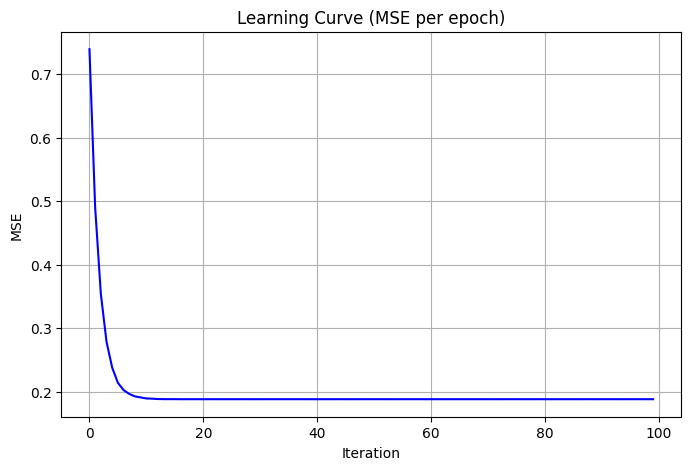

In [185]:
plt.figure(figsize=(8,5))
plt.plot(mse_hist, color="blue")
plt.title("Learning Curve (MSE per epoch)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

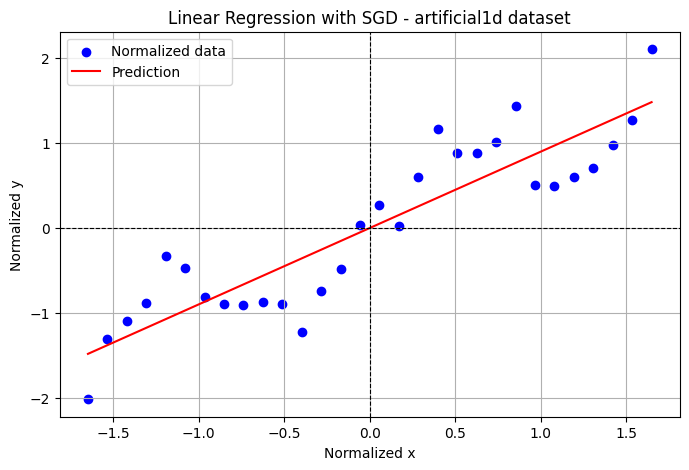

In [186]:
w0_final, w1_final = w_hist[-1]
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", label="Normalized data")
plt.plot(x, w0_final + w1_final * x, color="red", label="Prediction")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Linear Regression with SGD - artificial1d dataset")
plt.xlabel("Normalized x")
plt.ylabel("Normalized y")
plt.legend()
plt.grid(True)
plt.show()